In [19]:
"""
Purpose of this notebook will be to complete conversions on GMRT data. Then plot GMRT data to any sort of graph one may want. 

Input: 
central frequency -  [MHz]
Flux density - [uJy] 
days since explosion - [days] 


Returns: 
graphs dependent on your inputs 
unit conversion from [days] -> [seconds]  & central frequency [MHz] -> [Hz] -> [meters] 
.txt file 


Notes: 

Make sure you're in a working directory that you're comfortable saving .txt files to. 

"""


"\nPurpose of this notebook will be to complete conversions on GMRT data. Then plot GMRT data to any sort of graph one may want. \n\nInput: \ncentral frequency -  [MHz]\nFlux density - [uJy] \ndays since explosion - [days] \n\n\nReturns: \ngraphs dependent on your inputs \nunit conversion from [days] -> [seconds]  & central frequency [MHz] -> [Hz] -> [meters] \n.txt file \n\n\nNotes: \n\nMake sure you're in a working directory that you're comfortable saving .txt files to. \n\n"

In [4]:
#import necessary packages 

#this is a surprise tool that will help us later
from astropy.io import fits

#these are defaults from angel's notebooks :P
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# magic words to get high-resolution plots
%config InlineBackend.figure_format = 'retina'

In [13]:
#copied and pasted grmt_data -> central frequency [MHz] , flux density [uJy], and time [days] 

#create new arrays for flux_dens with uncertainintes 
flux = []
flux_uncert = []

# Iterate through each entry in the array
for i in flux_dens:
    # Extract value and uncertainty
    if '+/-' in i:
        value_str, uncertainty_str = i.split('+/-')
        value = float(value_str)
        uncert = float(uncertainty_str)
    elif i.startswith('<'):
        value = float(i[1:])
        uncert = 0  # Assume uncertainty as 0 if it's a less than value
    else:
        value = float(i)
        uncert = 0  # If no uncertainty provided

    #save into empty arrays from above 
    flux.append(value)
    flux_uncert.append(uncert)


#optional sorting lines below here for frequence & explosion time

#sort values for central freq just in case
#central_freq = sorted(central_freq)

#sort explosion time array, if 
explos_time = sorted(explos_time)



In [14]:
#############################
# unit conversion functions # 
#############################

###########
#if needed#
##########

def MHz_to_GHz(central_freq):
    """
    Purpose: Convert frequencies from MHz to GHz 
    input
    - central_freq(list of float): List of central frequencies in MHz.

    Returns:
        - List of central frequences in GHz
    """
    central_freq = [freq / 1000 for freq in central_freq]
    
    
    return central_freq


def hz_to_wave(central_freq):
    """
    Purpose: Convert frequencies from MHz to Hz then to corresponding wavelengths in meters(only any specified scaling).

    input
    - central_freq(list of float): List of central frequencies in MHz.

    Returns:
        - List of corresponding wavelengths in meters.
    """
    
    #decalare local speed of light 
    sea = 3e8 #[m/s]

    #MHz to Hz 
    central_freq = [freq * 1e6 for freq in central_freq]

    wavelengths = [sea / freq for freq in central_freq]

    
    
    return wavelengths

def days_to_sec(explos_time):
    """
    Purpose: Takes array of explosion time in days then converts to seconds 

    Input 
        - explosion time array in days 
    Returns
        - explosion time array in seconds 

    """

    #seconds in a day
    sec_in_day = 86400

    #convert from days to seconds 
    sec_per_day = [ day * sec_in_day for day in explos_time]

    #return explos_time array in seconds 
    return sec_per_day



In [18]:
"""
##########################
#Write data to .txt file#
##########################
"""


def write_grmt_data_txt(data,labels,fileName):
    """
    Purpose: write arrays into columns onto a .txt file 

    Input: arrays packed into tuple, name of your .txt file, and labels for columns
    Output: .txt file with arrays as columns


    notes: 
    write labels from left -> right 
    
    """

    
    with open(fileName, 'w') as file:
        file.write('\t'.join(labels) + '\n')
        
        for i in range(len(data[0])):
            # Write each corresponding element of arrays to a line in the file
            file.write('\t'.join(str(arr[i]) for arr in data) + '\n')

#pack data into tuple 
data = [explos_time, MHz_to_GHz(central_freq), flux, flux_uncert]

#make your labels 
labels = ["Time (Days)", "Frequency (GHz)", "Flux Density (μJy)", "Flux Error (μJy)"]

#name your file here
fileName = "grmt_data.txt"

#write your file 
write_grmt_data_txt(data,labels, fileName)


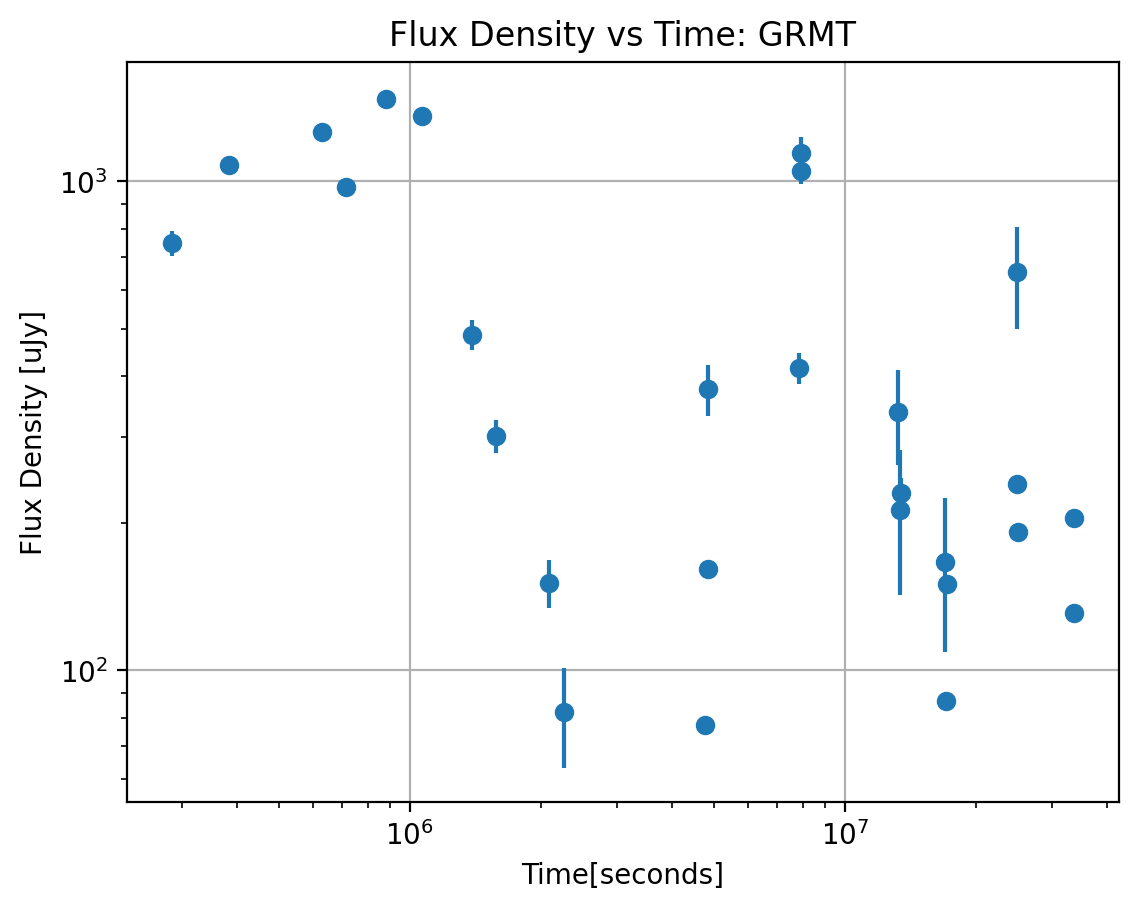

In [30]:
###################
# graph functions #
###################

#declare x-axis 
time = days_to_sec(explos_time)

plt.errorbar(time,flux, yerr= flux_uncert, fmt='o')
plt.title('Flux Density vs Time: GRMT')
plt.ylabel(r'Flux Density [uJy]')
plt.xlabel(r'Time[seconds]')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)

